# Exercizes on clustering

**Let's talk about the dataset, wich we can fin in this folder under the name of "dataset for clustering" or something like that.**

1.  3-cluster.csv contains 3 well separated clusters, very simple case.
2.  dataset-DBSCAN.csv with a dataset ready for DBSCAN algorithm created by the author of this algorithm, we compare both on k-mean and on dbscan 
3.  CURE-complete.csv --> a big dataset, per renderlo + leggero si possono prendere 1 esempio ogni 10, così da rendere il tutto più veloce.

150 x 2 - 150 record with 2 features.

Abbiamo tre dataset per il clustering:

1) 3-clusters [150,2]: dataset semplice che contiene tre cluster ben separati (alto BSSE?)
    
    questi cluster sono globulari e semplici

2) dataset-DBSCAN [6118,2]: dataset degli autori di DBSCAN compatibile e fatto apposta per esso, lo useremo anche su k-means
    
    questi cluster NON sono di forma globulare

3) CURE-complete [86558,2]: dataset degli autori di CURE, molto grande e completo
    
    questi cluster sono di forma globulare ma con del rumore 

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="Datasets for clustering-20211122/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
'''
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)
'''

n_samples=
150
n_samples=
6118
n_samples=
86558


'\nprint("dataset n. 1: n samples, n features")\nprint(n_samples1, n_features1)\nprint("dataset n. 2: n samples, n features")\nprint(n_samples2, n_features2)\nprint("dataset n. 3: n samples, n features")\nprint(n_samples3, n_features3)\n'

The following program plots the dataset n.1

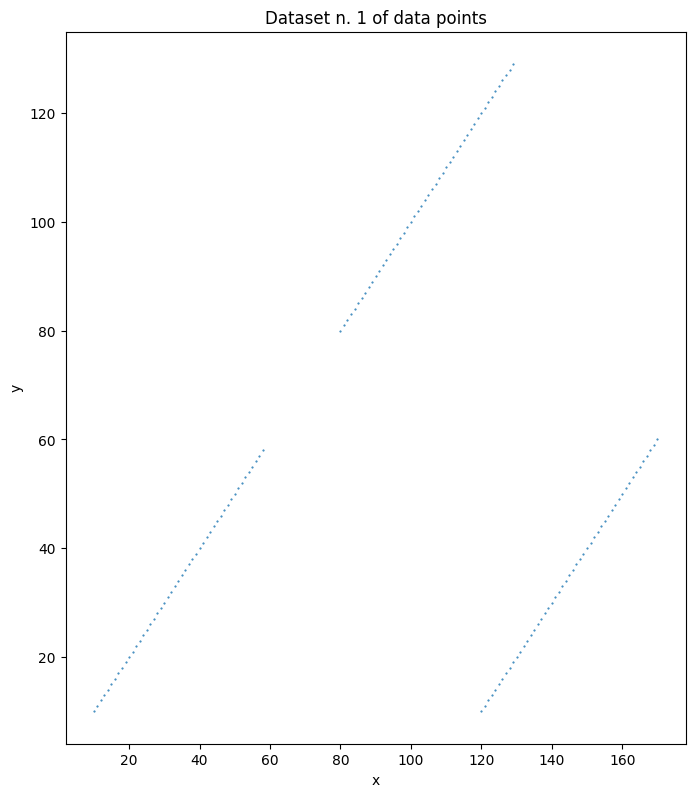

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

In [ ]:
pip install matplotlib --upgrade

The following is the program for plotting the dataset n.2

NB: non sono dataset di forma globulare questi!! (Quindi dovrebbe essere che k-means non va bene)

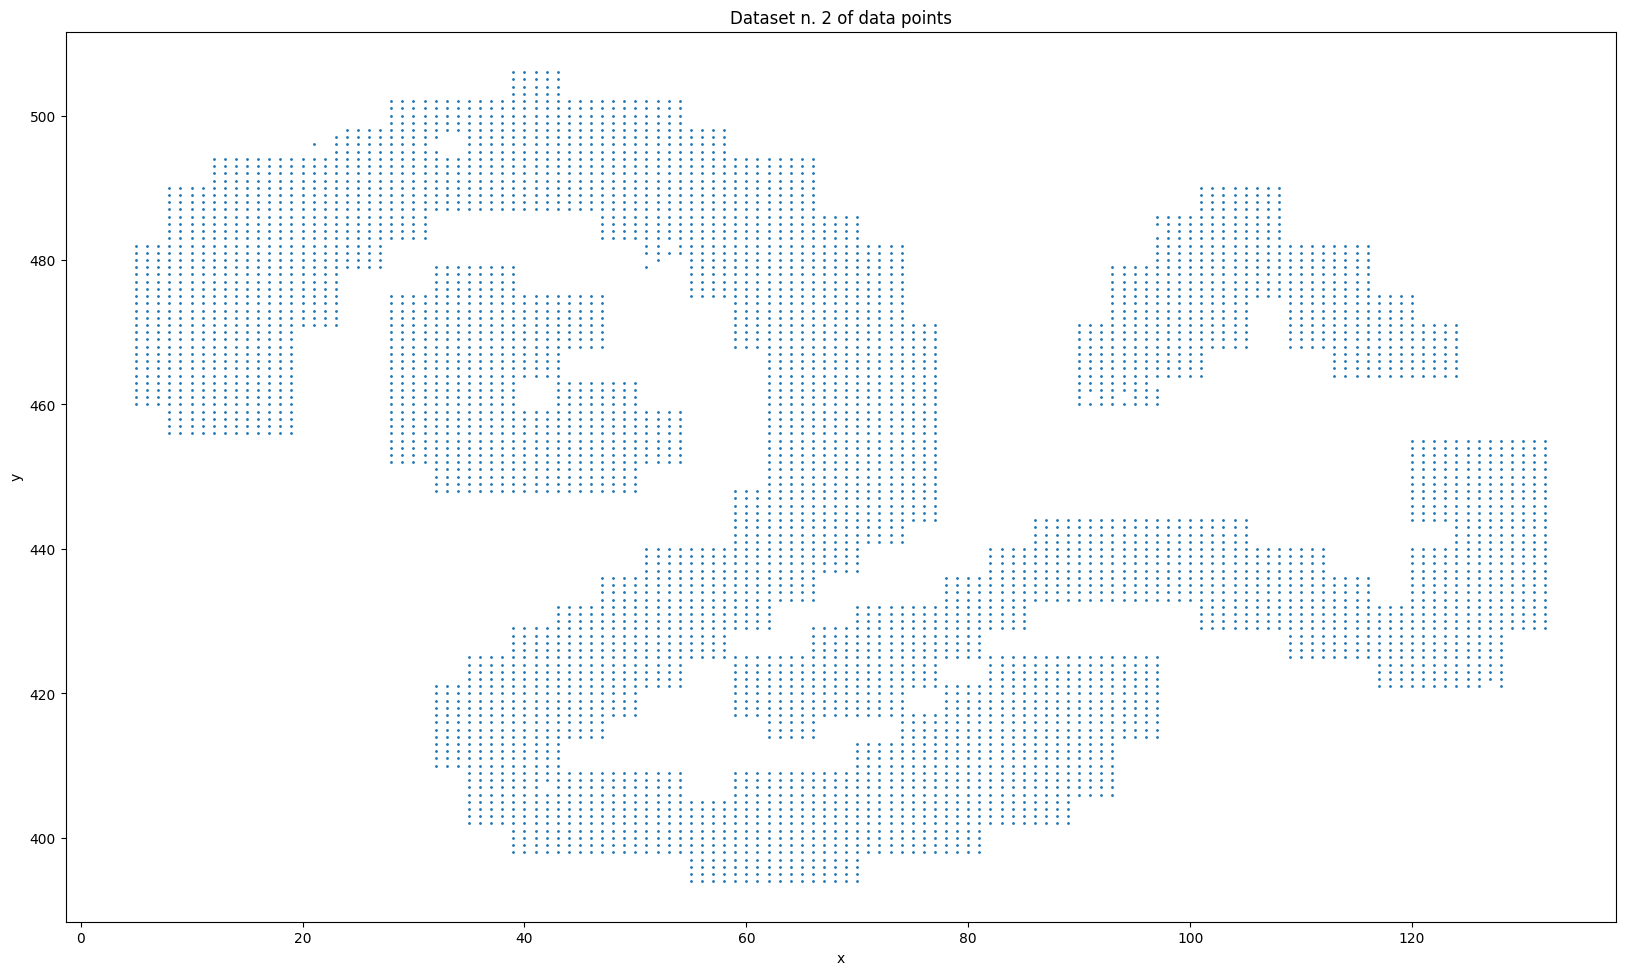

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

n.b. questi cluster hanno del rumore

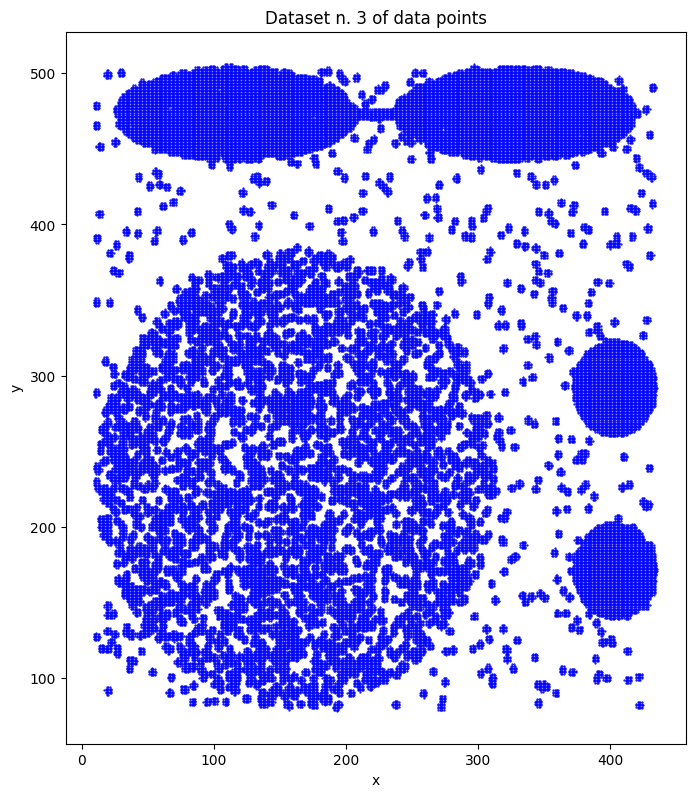

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
#file_path="./"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

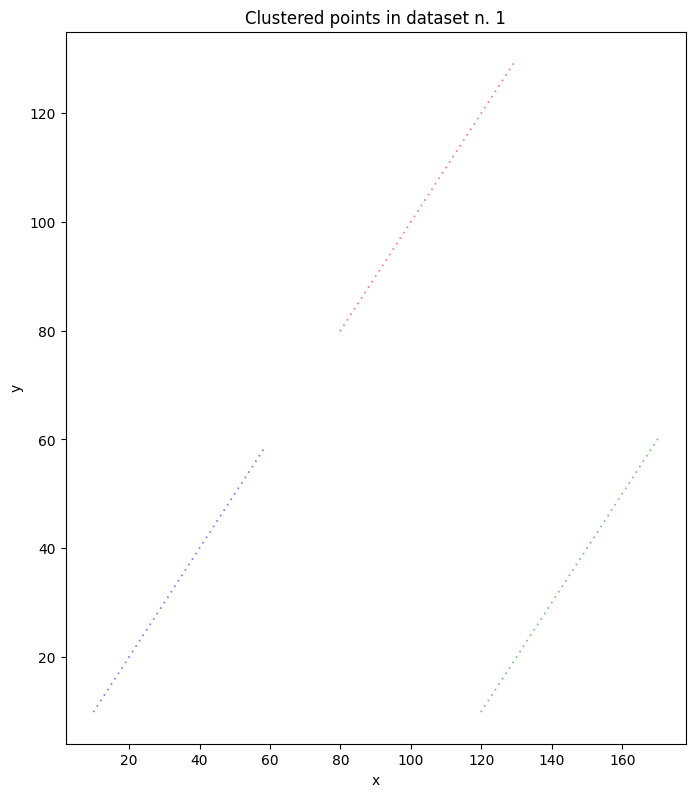

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

# Esercizi individuali:

Load datasets

In [21]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       '''
       print("n_samples=")
       print(n_samples)
       '''
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

file_path="Datasets for clustering-20211122/"
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

## Es. 1: 
In the following program we cluster the dataset n.2 with K-means.

In the following cell I propose you to perform clustering with K-means on dataset2.

In [22]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

In [23]:
from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans2 = KMeans(n_clusters=k, random_state=5).fit(data1)
    
"""
i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans2.labels_[i]))
    """


'\ni=0\nfor i in range(n_samples1):\n    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")\n    print("in cluster n."+str(kmeans2.labels_[i]))\n    '

In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

*Risposta:* L'algoritmo k-means lavora proprio in questo modo, crea 3 centroidi (in questo caso visto che k = 0) e li inizializza a valori randomici. Ad ogni iterazione l'algoritmo assiocia ad ogni sample un centroide (che è una lista di valori). Dopo di che viene calcolata la posizione del centroide (la media dei valori dei samples che appartengono al centroide) e viene calcolata la distanza tra il centroide e ogni sample. Se la distanza è minore di una certa soglia (che è un parametro che viene scelto in base alla dimensione del dataset) allora il sample viene assegnato al centroide. In questo modo viene calcolata la posizione dei centroidi e viene fatta una nuova iterazione ricalcolando il centroide sulla base delle media degli esempi che fanno parte del cluster generato ne fanno parte.

K-mean cerca di minimizzare SSE e di conseguenza tende a creare cluster diu forma globulare.

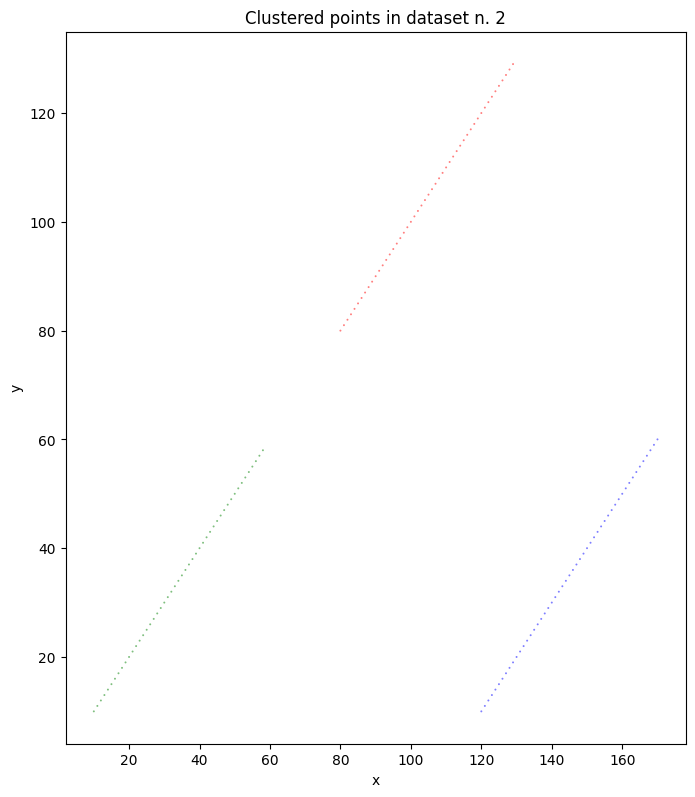

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans2.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

## Es. 2:

In the following cell, I propose you to perform clustering with K-means on the dataset3 I propose you to plot clustering results on dataset3 and I propose you to perform clustering with K-means on the dataset3.

**Answer:** 
how do you explain what it happens?

Sempre stesso discorso di prima, i punti sono classificati in base al centroide più vicino. Quindi un punto può appartene ad un cluster, quindi essere più vicino ai punti che compongono un determinato cluster, ma essere comunque più vicini al centroide di un altro cluster e quindi essere classificati in maniera "errata".

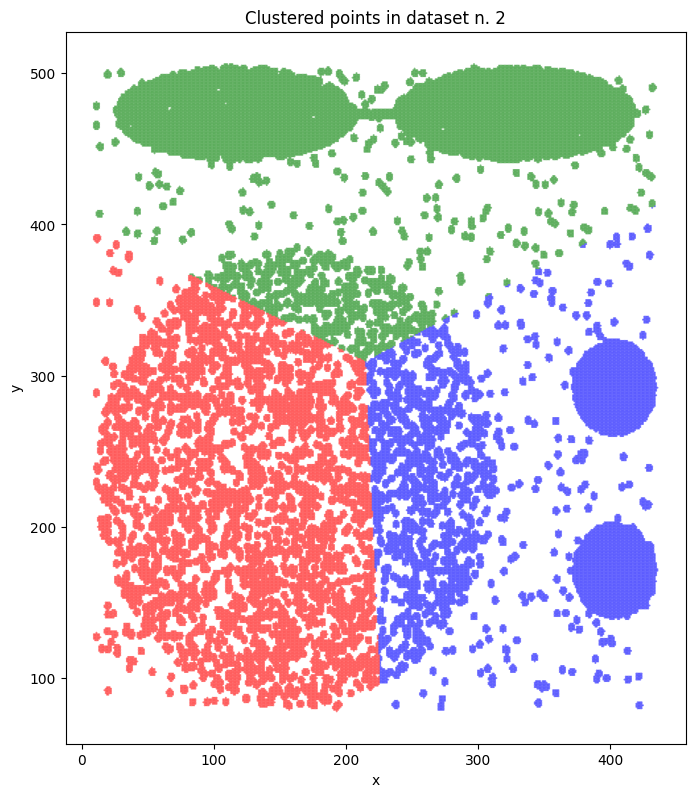

In [26]:
from sklearn.cluster import KMeans

data3,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name3)

np.random.seed(5)

k=3
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data3)
  
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples1) if kmeans2.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples1) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()


In [16]:
data3

array([[  9., 480.],
       [  9., 479.],
       [  9., 478.],
       ...,
       [436., 292.],
       [436., 172.],
       [436., 171.]])

## Es. 3:

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

Run 1 	avg. silhouette: 0.47994768084742495
Run 2 	avg. silhouette: 0.4795833205927193
Run 3 	avg. silhouette: 0.47999454508775985
Run 4 	avg. silhouette: 0.4797019669403981
Run 5 	avg. silhouette: 0.48006914019384417
Run 6 	avg. silhouette: 0.4796218421686812
Run 7 	avg. silhouette: 0.4794715070000474
Run 8 	avg. silhouette: 0.4794715070000474
Run 9 	avg. silhouette: 0.4797019669403981
Run 10 	avg. silhouette: 0.47952024649292074


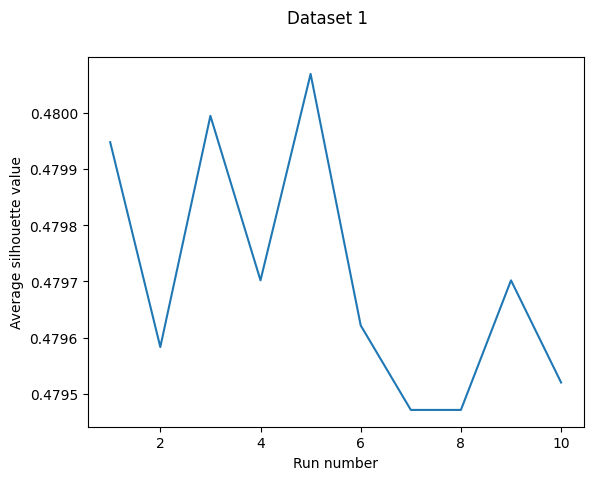


Best clusterer is from run number 5 and has an avg silhouette of 0.48006914019384417


In [20]:
#evaluation on 1st dataset (K = 3, 10 times random init)
from sklearn.metrics import silhouette_score
k = 3
sil = {}
best_clusterer = None
best_run = None
best_sil = -1
for i in range(1, 11):
    clusterer = KMeans(n_clusters=k,n_init=1,init='random')
    cluster_labels = clusterer.fit_predict(data1)

    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("Run",i,"\tavg. silhouette:",silhouette_avg)
    sil[i] = silhouette_avg
    if silhouette_avg > best_sil:
        best_sil = silhouette_avg
        best_clusterer = clusterer
        best_run = i
plt.figure().suptitle('Dataset 1')
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Run number")
plt.ylabel("Average silhouette value")
plt.show()
print("\nBest clusterer is from run number",best_run,"and has an avg silhouette of",best_sil)

In [ ]:
#evaluation on 2nd dataset (K = 4, 10 times random init)
from sklearn.metrics import silhouette_score
k = 4
sil = {}
best_clusterer = None
best_run = None
best_sil = -1
for i in range(1, 11):
    clusterer = KMeans(n_clusters=k,n_init=1,init='random')
    cluster_labels = clusterer.fit_predict(data2)

    silhouette_avg = silhouette_score(data2, cluster_labels)
    print("Run",i,"\tavg. silhouette:",silhouette_avg)
    sil[i] = silhouette_avg
    if silhouette_avg > best_sil:
        best_sil = silhouette_avg
        best_clusterer = clusterer
        best_run = i
plt.figure().suptitle('Dataset 2')
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Run number")
plt.ylabel("Average silhouette value")
plt.show()
print("\nBest clusterer is from run number",best_run,"and has an avg silhouette of",best_sil)

In [ ]:
#evaluation on 3rd dataset (K = 5, 10 times random init)
from sklearn.metrics import silhouette_score
k = 5
sil = {}
best_clusterer = None
best_run = None
best_sil = -1
for i in range(1, 3):
    clusterer = KMeans(n_clusters=k,n_init=1,init='random')
    cluster_labels = clusterer.fit_predict(data3)

    silhouette_avg = silhouette_score(data3, cluster_labels)
    print("Run",i,"\tavg. silhouette:",silhouette_avg)
    sil[i] = silhouette_avg
    if silhouette_avg > best_sil:
        best_sil = silhouette_avg
        best_clusterer = clusterer
        best_run = i
plt.figure().suptitle('Dataset 3')
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Run number")
plt.ylabel("Average silhouette value")
plt.show()
print("\nBest clusterer is from run number",best_run,"and has an avg silhouette of",best_sil)

## Es. 4:

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.


 k= 2 Best clusterer is from run number 2 and has an avg silhouette of 0.43322366812579544

 k= 3 Best clusterer is from run number 3 and has an avg silhouette of 0.4797598339098002

Best value of k is 3 and has an avg silhouette of 0.4797598339098002


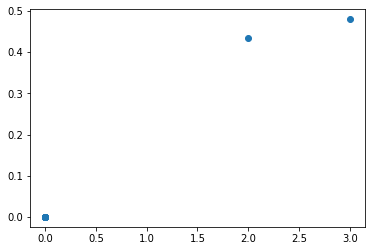

In [5]:
#evaluation on 1rd dataset
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt

best_sil_tot = -1
best_k = 0;

sil_val = np.zeros(shape=(10,2))

for k in range(2, 10):
    #k = 5
    sil = {}
    best_clusterer = None
    best_run = None
    best_sil = -1

    for i in range(1, 11):
        clusterer = KMeans(n_clusters=k,n_init=1,init='random')
        cluster_labels = clusterer.fit_predict(data1)

        silhouette_avg = silhouette_score(data1, cluster_labels)
        #print("Run",i,"\tavg. silhouette:",silhouette_avg)
        sil[i] = silhouette_avg
        if silhouette_avg > best_sil:
            best_sil = silhouette_avg
            best_clusterer = clusterer
            best_run = i

    
    # plt.figure().suptitle('Dataset 1 ')
    # plt.plot(list(sil.keys()), list(sil.values()))
    # plt.xlabel("Run number")
    # plt.ylabel("Average silhouette value")
    # plt.show()
    print("\n k=",k,"Best clusterer is from run number",best_run,"and has an avg silhouette of",best_sil)

    sil_val[k] = [k,best_sil]

    if best_sil_tot < best_sil:
        best_k = k
        best_sil_tot = best_sil

print("\nBest value of k is",best_k,"and has an avg silhouette of",best_sil_tot)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = sil_val[:,0]
y = sil_val[:,1]

ax.scatter(x, y)
plt.show()

In [ ]:
#evaluation on 1rd dataset
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt

best_sil_tot = -1
best_k = 0;

sil_val = np.zeros(shape=(10,2))

for k in range(2, 10):
    #k = 5
    sil = {}
    best_clusterer = None
    best_run = None
    best_sil = -1

    for i in range(1, 11):
        clusterer = KMeans(n_clusters=k,n_init=1,init='random')
        cluster_labels = clusterer.fit_predict(data1)

        silhouette_avg = silhouette_score(data1, cluster_labels)
        #print("Run",i,"\tavg. silhouette:",silhouette_avg)
        sil[i] = silhouette_avg
        if silhouette_avg > best_sil:
            best_sil = silhouette_avg
            best_clusterer = clusterer
            best_run = i

    
    # plt.figure().suptitle('Dataset 1 ')
    # plt.plot(list(sil.keys()), list(sil.values()))
    # plt.xlabel("Run number")
    # plt.ylabel("Average silhouette value")
    # plt.show()
    print("\n k=",k,"Best clusterer is from run number",best_run,"and has an avg silhouette of",best_sil)

    sil_val[k] = [k,best_sil]

    if best_sil_tot < best_sil:
        best_k = k
        best_sil_tot = best_sil

print("\nBest value of k is",best_k,"and has an avg silhouette of",best_sil_tot)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = sil_val[:,0]
y = sil_val[:,1]

ax.scatter(x, y)
plt.show()

#evaluation on 1rd dataset
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt

best_sil_tot = -1
best_k = 0;

sil_val = np.zeros(shape=(10,2))

for k in range(2, 10):
    #k = 5
    sil = {}
    best_clusterer = None
    best_run = None
    best_sil = -1

    for i in range(1, 11):
        clusterer = KMeans(n_clusters=k,n_init=1,init='random')
        cluster_labels = clusterer.fit_predict(data1)

        silhouette_avg = silhouette_score(data1, cluster_labels)
        #print("Run",i,"\tavg. silhouette:",silhouette_avg)
        sil[i] = silhouette_avg
        if silhouette_avg > best_sil:
            best_sil = silhouette_avg
            best_clusterer = clusterer
            best_run = i

    
    # plt.figure().suptitle('Dataset 1 ')
    # plt.plot(list(sil.keys()), list(sil.values()))
    # plt.xlabel("Run number")
    # plt.ylabel("Average silhouette value")
    # plt.show()
    print("\n k=",k,"Best clusterer is from run number",best_run,"and has an avg silhouette of",best_sil)

    sil_val[k] = [k,best_sil]

    if best_sil_tot < best_sil:
        best_k = k
        best_sil_tot = best_sil

print("\nBest value of k is",best_k,"and has an avg silhouette of",best_sil_tot)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = sil_val[:,0]
y = sil_val[:,1]

ax.scatter(x, y)
plt.show()

#evaluation on 1rd dataset
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt

best_sil_tot = -1
best_k = 0;

sil_val = np.zeros(shape=(10,2))

for k in range(2, 10):
    #k = 5
    sil = {}
    best_clusterer = None
    best_run = None
    best_sil = -1

    for i in range(1, 11):
        clusterer = KMeans(n_clusters=k,n_init=1,init='random')
        cluster_labels = clusterer.fit_predict(data1)

        silhouette_avg = silhouette_score(data1, cluster_labels)
        #print("Run",i,"\tavg. silhouette:",silhouette_avg)
        sil[i] = silhouette_avg
        if silhouette_avg > best_sil:
            best_sil = silhouette_avg
            best_clusterer = clusterer
            best_run = i

    
    # plt.figure().suptitle('Dataset 1 ')
    # plt.plot(list(sil.keys()), list(sil.values()))
    # plt.xlabel("Run number")
    # plt.ylabel("Average silhouette value")
    # plt.show()
    print("\n k=",k,"Best clusterer is from run number",best_run,"and has an avg silhouette of",best_sil)

    sil_val[k] = [k,best_sil]

    if best_sil_tot < best_sil:
        best_k = k
        best_sil_tot = best_sil

print("\nBest value of k is",best_k,"and has an avg silhouette of",best_sil_tot)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = sil_val[:,0]
y = sil_val[:,1]

ax.scatter(x, y)
plt.show()

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.